# STAR WARS: The Data Strikes Back

In [1]:
#import dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns

In [2]:
#API Calls
#films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()

#people
url_people = "http://swapi.dev/api/people/" 
people_response = requests.get(url_people).json()

#planets
url_planets = "http://swapi.dev/api/planets/"
planets_response = requests.get(url_planets).json()

#species
url_species = "http://swapi.dev/api/species/" 
species_response = requests.get(url_species).json()

#vehicles
url_vehicles = "http://swapi.dev/api/vehicles/" 
vehicles_response = requests.get(url_vehicles).json()

#starships
url_starships = "http://swapi.dev/api/starships/"
starships_response = requests.get(url_starships).json()

# Star Wars Films

In [3]:
#API Call for films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()
## Film json dump (captioned out to save space)
print(json.dumps(films_response, indent=2, sort_keys=True))

{
  "count": 6,
  "next": null,
  "previous": null,
  "results": [
    {
      "characters": [
        "http://swapi.dev/api/people/1/",
        "http://swapi.dev/api/people/2/",
        "http://swapi.dev/api/people/3/",
        "http://swapi.dev/api/people/4/",
        "http://swapi.dev/api/people/5/",
        "http://swapi.dev/api/people/6/",
        "http://swapi.dev/api/people/7/",
        "http://swapi.dev/api/people/8/",
        "http://swapi.dev/api/people/9/",
        "http://swapi.dev/api/people/10/",
        "http://swapi.dev/api/people/12/",
        "http://swapi.dev/api/people/13/",
        "http://swapi.dev/api/people/14/",
        "http://swapi.dev/api/people/15/",
        "http://swapi.dev/api/people/16/",
        "http://swapi.dev/api/people/18/",
        "http://swapi.dev/api/people/19/",
        "http://swapi.dev/api/people/81/"
      ],
      "created": "2014-12-10T14:23:31.880000Z",
      "director": "George Lucas",
      "edited": "2014-12-20T19:49:45.256000Z",
   

# Pull all FILMS and specified data

In [4]:
#set up lists to store film data
film_counter=0
film_title = []
film_episode_id = []
film_release_date = []
film_url = []
species_per_film = []
characters_per_film = []
planets_per_film = []
vehicles_per_film = []
starships_per_film = []

#loop through film data and append lists
for films in films_response["results"]:
    movie_title = films["title"]
    film_title.append(movie_title)
    episode_number = films["episode_id"]
    film_episode_id.append(episode_number)
    date_released = films["release_date"]
    film_release_date.append(date_released)
    movie_url = films["url"]
    film_url.append(movie_url)
    species_film = films["species"]
    species_per_film.append(species_film)
    film_characters = films["characters"]
    characters_per_film.append(film_characters)
    film_planets = films["planets"]
    planets_per_film.append(film_planets)
    film_vehicles = films["vehicles"]
    vehicles_per_film.append(film_vehicles)
    film_starships = films["starships"]
    starships_per_film.append(film_starships)    
    film_counter+=1
    print(f'Film {film_counter} Found! Star Wars Episode {episode_number}: {movie_title} | Release Date: {date_released}')
    


Film 1 Found! Star Wars Episode 4: A New Hope | Release Date: 1977-05-25
Film 2 Found! Star Wars Episode 5: The Empire Strikes Back | Release Date: 1980-05-17
Film 3 Found! Star Wars Episode 6: Return of the Jedi | Release Date: 1983-05-25
Film 4 Found! Star Wars Episode 1: The Phantom Menace | Release Date: 1999-05-19
Film 5 Found! Star Wars Episode 2: Attack of the Clones | Release Date: 2002-05-16
Film 6 Found! Star Wars Episode 3: Revenge of the Sith | Release Date: 2005-05-19


In [5]:
species_per_film_series = pd.Series([len(species_per_film[0]),
                                    len(species_per_film[1]),
                                    len(species_per_film[2]), 
                                    len(species_per_film[3]), 
                                    len(species_per_film[4]), 
                                    len(species_per_film[5])])

print(species_per_film_series)

characters_per_film_series = pd.Series([len(characters_per_film[0]),
                                    len(characters_per_film[1]),
                                    len(characters_per_film[2]), 
                                    len(characters_per_film[3]), 
                                    len(characters_per_film[4]), 
                                    len(characters_per_film[5])])
print(characters_per_film_series)

planets_per_film_series = pd.Series([len(planets_per_film[0]),
                                    len(planets_per_film[1]),
                                    len(planets_per_film[2]), 
                                    len(planets_per_film[3]), 
                                    len(planets_per_film[4]), 
                                    len(planets_per_film[5])])
print(planets_per_film_series)

vehicles_per_film_series = pd.Series([len(vehicles_per_film[0]),
                                    len(vehicles_per_film[1]),
                                    len(vehicles_per_film[2]), 
                                    len(vehicles_per_film[3]), 
                                    len(vehicles_per_film[4]), 
                                    len(vehicles_per_film[5])])
print(vehicles_per_film_series)

starships_per_film_series = pd.Series([len(starships_per_film[0]),
                                    len(starships_per_film[1]),
                                    len(starships_per_film[2]), 
                                    len(starships_per_film[3]), 
                                    len(starships_per_film[4]), 
                                    len(starships_per_film[5])])
print(starships_per_film_series)

0     5
1     5
2     9
3    20
4    14
5    20
dtype: int64
0    18
1    16
2    20
3    34
4    40
5    34
dtype: int64
0     3
1     4
2     5
3     3
4     5
5    13
dtype: int64
0     4
1     6
2     8
3     7
4    11
5    13
dtype: int64
0     8
1     9
2    12
3     5
4     9
5    12
dtype: int64


In [6]:
#create new dataframe for film data
films_df = pd.DataFrame({
                        "Title": film_title,
                        "Episode ID": film_episode_id,
                        "Release Date": film_release_date,
                        "URL": film_url,
                        "Species/Film": species_per_film_series,
                        "Characters/Film": characters_per_film_series,
                        "Planets/Film": planets_per_film_series,
                        "Vehicles/Film": vehicles_per_film_series,
                        "Starships/Film": starships_per_film_series})
films_df.to_csv("csv_output/films_to_clean.csv")
films_df
#"Species/Film": species_per_film,
#"Characters/Film": characters_per_film


,Title,Episode ID,Release Date,URL,Species/Film,Characters/Film,Planets/Film,Vehicles/Film,Starships/Film
0,A New Hope,4,1977-05-25,http://swapi.dev/api/films/1/,5,18,3,4,8
1,The Empire Strikes Back,5,1980-05-17,http://swapi.dev/api/films/2/,5,16,4,6,9
2,Return of the Jedi,6,1983-05-25,http://swapi.dev/api/films/3/,9,20,5,8,12
3,The Phantom Menace,1,1999-05-19,http://swapi.dev/api/films/4/,20,34,3,7,5
4,Attack of the Clones,2,2002-05-16,http://swapi.dev/api/films/5/,14,40,5,11,9
5,Revenge of the Sith,3,2005-05-19,http://swapi.dev/api/films/6/,20,34,13,13,12


In [7]:
#create new dataframe for film data
bar_plot_df = pd.DataFrame({"Title": film_title,
                            "Number of Characters": characters_per_film_series,
                            "Number of Species": species_per_film_series,
                            "Number of Planets": planets_per_film_series,
                            "Number of Vehicles": vehicles_per_film_series,
                            "Number of Starships": starships_per_film_series})

bar_plot_df

,Title,Number of Characters,Number of Species,Number of Planets,Number of Vehicles,Number of Starships
0,A New Hope,18,5,3,4,8
1,The Empire Strikes Back,16,5,4,6,9
2,Return of the Jedi,20,9,5,8,12
3,The Phantom Menace,34,20,3,7,5
4,Attack of the Clones,40,14,5,11,9
5,Revenge of the Sith,34,20,13,13,12


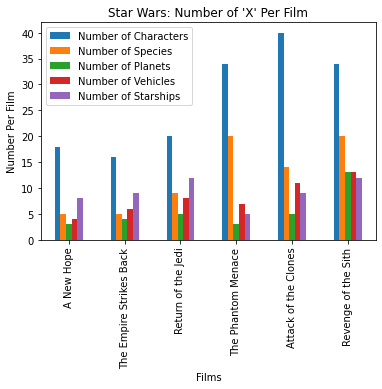

In [8]:
#bar plot number of X per film
labels = film_title
tick_locations = np.arange(len(bar_plot_df))
data_per_film_bar_plot = bar_plot_df.plot.bar(rot=0)
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars: Number of 'X' Per Film")
plt.xlabel("Films")
plt.ylabel("Number Per Film")
plt.savefig("Figures/Bar_All_Per_Film_RK.png")


plt.show()

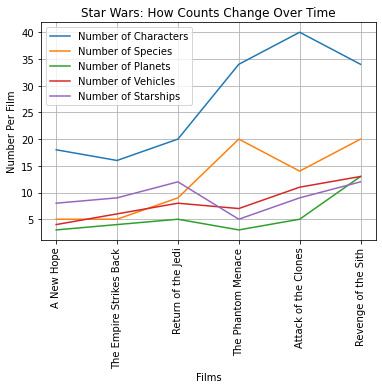

In [9]:
#line plot showing how number of things changed over time
characters = [characters_per_film_series]
species = [species_per_film_series]
planets = [planets_per_film_series]
vehicles = [vehicles_per_film_series]
starships = [starships_per_film_series]
tick_locations = np.arange(len(bar_plot_df))
labels = films_df["Title"]
#index = ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']
data_per_film_line_plot = bar_plot_df.plot.line(rot=0)
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars: How Counts Change Over Time")
plt.xlabel("Films")
plt.ylabel("Number Per Film")
plt.grid()
plt.savefig("Figures/Line_All_Per_Film_RK.png")
plt.show()

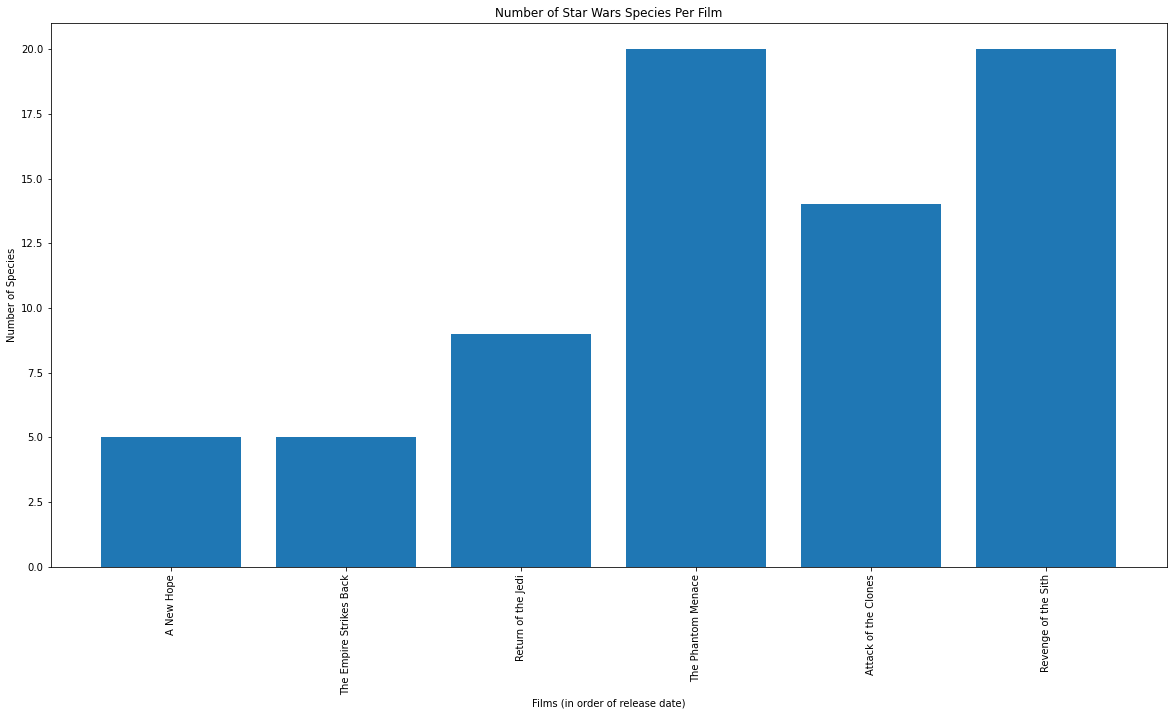

In [10]:

#bar chart for species per film
tick_locations = [value for value in films_df["Title"]]
labels = films_df["Title"]
plt.figure(figsize=(20, 10))
plt.bar(films_df["Title"], films_df["Species/Film"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Number of Species")
plt.xlabel("Films (in order of release date)")
plt.title("Number of Star Wars Species Per Film")
plt.savefig("Figures/Bar_Species_Per_Film_RK.png")
plt.show()

# Star Wars Characters

In [11]:
# People/Characters json dump
#print(json.dumps(people_response, indent=2, sort_keys=True))

# Pull all CHARACTERS and specified data

In [12]:
#new lists to store character info
character_list = []
character_height = []
character_mass = []
character_species = []
character_first_movie = []
character_last_movie = []
character_number_movies = []
page = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
url_people_next = f"http://swapi.dev/api/people/?page="

for x in page:
    people_response_next = requests.get(url_people_next + x).json()
    
#for loop to list names
    for people in people_response_next["results"]:
        character_name = people["name"]
        character_list.append(character_name)
        
        height = people["height"]
        character_height.append(height)
        
        mass = people["mass"]
        character_mass.append(mass)
        
        char_species = people["species"]
        character_species.append(char_species)
        
        character_movie = people["films"][0]
        character_first_movie.append(character_movie)
        
        character_movie_last = people["films"][-1]
        character_last_movie.append(character_movie_last)
        
        character_movie_total = len(people["films"])
        character_number_movies.append(character_movie_total)
        print(f'{character_name} found!')

Luke Skywalker found!
C-3PO found!
R2-D2 found!
Darth Vader found!
Leia Organa found!
Owen Lars found!
Beru Whitesun lars found!
R5-D4 found!
Biggs Darklighter found!
Obi-Wan Kenobi found!
Anakin Skywalker found!
Wilhuff Tarkin found!
Chewbacca found!
Han Solo found!
Greedo found!
Jabba Desilijic Tiure found!
Wedge Antilles found!
Jek Tono Porkins found!
Yoda found!
Palpatine found!
Boba Fett found!
IG-88 found!
Bossk found!
Lando Calrissian found!
Lobot found!
Ackbar found!
Mon Mothma found!
Arvel Crynyd found!
Wicket Systri Warrick found!
Nien Nunb found!
Qui-Gon Jinn found!
Nute Gunray found!
Finis Valorum found!
Padmé Amidala found!
Jar Jar Binks found!
Roos Tarpals found!
Rugor Nass found!
Ric Olié found!
Watto found!
Sebulba found!
Quarsh Panaka found!
Shmi Skywalker found!
Darth Maul found!
Bib Fortuna found!
Ayla Secura found!
Ratts Tyerel found!
Dud Bolt found!
Gasgano found!
Ben Quadinaros found!
Mace Windu found!
Ki-Adi-Mundi found!
Kit Fisto found!
Eeth Koth found!
Adi Gall

In [13]:
#create new dataframe for all characters found with their data
characters_df = pd.DataFrame({"Character": character_list,
                              "Height": character_height,
                              "Mass": character_mass, 
                              "Species": character_species, 
                              "First Film": character_first_movie,
                              "Last Film": character_last_movie,
                              "Number of Film Appearances": character_number_movies})


characters_df.head(20)


,Character,Height,Mass,Species,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,[http://swapi.dev/api/species/2/],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,[http://swapi.dev/api/species/2/],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
5,Owen Lars,178,120,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
6,Beru Whitesun lars,165,75,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
7,R5-D4,97,32,[http://swapi.dev/api/species/2/],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
8,Biggs Darklighter,183,84,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
9,Obi-Wan Kenobi,182,77,[],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6


In [14]:
#drop characters that don't have a height or mass listed and create new dataframe for tracking purposes
cleaning_characters_df = characters_df.drop(characters_df[characters_df['Height'] == 'unknown'].index) 
cleaning_characters_df = characters_df.drop(characters_df[characters_df['Mass'] == 'unknown'].index) 

print(cleaning_characters_df.head(20))

#output to CSV to add missing Species [http://swapi.dev/api/species/1/: Human]
cleaning_characters_df.to_csv("csv_output/character_output.csv")


                Character Height   Mass                            Species  \
0          Luke Skywalker    172     77                                 []   
1                   C-3PO    167     75  [http://swapi.dev/api/species/2/]   
2                   R2-D2     96     32  [http://swapi.dev/api/species/2/]   
3             Darth Vader    202    136                                 []   
4             Leia Organa    150     49                                 []   
5               Owen Lars    178    120                                 []   
6      Beru Whitesun lars    165     75                                 []   
7                   R5-D4     97     32  [http://swapi.dev/api/species/2/]   
8       Biggs Darklighter    183     84                                 []   
9          Obi-Wan Kenobi    182     77                                 []   
10       Anakin Skywalker    188     84                                 []   
12              Chewbacca    228    112  [http://swapi.dev/api/s

In [15]:
#input CSV with full Species values
cleaning_characters_df = pd.read_csv("csv_output/character_output_clean.csv")
#delete unnecessary column and clean values "1,358":1358 & "Jabba Desilijic Tiure" to "Jabba The Hutt"
del cleaning_characters_df['Unnamed: 0']
cleaning_characters_df=cleaning_characters_df.reset_index(drop=True)
cleaning_characters_df.iloc[[14],[2]]=1358
cleaning_characters_df.iloc[[14],[0]]="Jabba The Hutt"
cleaning_characters_df

,Character,Height,Mass,Species,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,['http://swapi.dev/api/species/2/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,['http://swapi.dev/api/species/2/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
5,Owen Lars,178,120,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
6,Beru Whitesun lars,165,75,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
7,R5-D4,97,32,['http://swapi.dev/api/species/2/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
8,Biggs Darklighter,183,84,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
9,Obi-Wan Kenobi,182,77,['http://swapi.dev/api/species/1/'],http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6


In [16]:
#remove [' '] from Species Column to prepare for merge
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("[","")
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("]","")
cleaning_characters_df['Species'] = cleaning_characters_df['Species'].str.replace("'","")
cleaning_characters_df.head()

,Character,Height,Mass,Species,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4


In [17]:
#Change "Species" column name to "URL" for merge (below after Species API pull)

cleaner_characters_df = cleaning_characters_df.rename(columns={"Species": "URL"})
cleaner_characters_df.head()

,Character,Height,Mass,URL,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4


In [18]:
clean_char_height_series = pd.to_numeric(cleaner_characters_df["Height"])
clean_char_mass_series = pd.to_numeric(cleaner_characters_df["Mass"])


clean_characters_df = pd.DataFrame({"Character": cleaner_characters_df["Character"],
                                 "Height": clean_char_height_series,
                                 "Mass": clean_char_mass_series,
                                 "URL": cleaner_characters_df["URL"], 
                                 "First Film": cleaner_characters_df["First Film"],
                                 "Last Film": cleaner_characters_df["Last Film"],
                                 "Number of Film Appearances": cleaner_characters_df["Number of Film Appearances"]})
clean_characters_df

,Character,Height,Mass,URL,First Film,Last Film,Number of Film Appearances
0,Luke Skywalker,172,77.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
1,C-3PO,167,75.0,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
2,R2-D2,96,32.0,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6
3,Darth Vader,202,136.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
4,Leia Organa,150,49.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
5,Owen Lars,178,120.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
6,Beru Whitesun lars,165,75.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
7,R5-D4,97,32.0,http://swapi.dev/api/species/2/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
8,Biggs Darklighter,183,84.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/1/,1
9,Obi-Wan Kenobi,182,77.0,http://swapi.dev/api/species/1/,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,6


In [19]:
# Height and Mass Dataframes by ascending order for ease of plotting

height_df = clean_characters_df.sort_values("Height", ascending=True)
print(height_df.head())

mass_df = clean_characters_df.sort_values("Mass", ascending=True)
print(mass_df.head())

                Character  Height  Mass                               URL  \
17                   Yoda      66  17.0   http://swapi.dev/api/species/6/   
35           Ratts Tyerel      79  15.0  http://swapi.dev/api/species/16/   
25  Wicket Systri Warrick      88  20.0   http://swapi.dev/api/species/9/   
36               Dud Bolt      94  45.0  http://swapi.dev/api/species/17/   
2                   R2-D2      96  32.0   http://swapi.dev/api/species/2/   

                       First Film                      Last Film  \
17  http://swapi.dev/api/films/2/  http://swapi.dev/api/films/6/   
35  http://swapi.dev/api/films/4/  http://swapi.dev/api/films/4/   
25  http://swapi.dev/api/films/3/  http://swapi.dev/api/films/3/   
36  http://swapi.dev/api/films/4/  http://swapi.dev/api/films/4/   
2   http://swapi.dev/api/films/1/  http://swapi.dev/api/films/6/   

    Number of Film Appearances  
17                           5  
35                           1  
25                           

# Species

In [20]:
#SPECIES
#print(json.dumps(species_response, indent=2, sort_keys=True))

In [21]:
#create lists to store species data
species_types = []
species_avg_height = []
species_avg_life = []
species_classification = []
species_designation = []
species_url_list = []
#page iterator & url
page = ["1", "2", "3", "4"]
find_species_url = f"http://swapi.dev/api/species/?page="

for x in page:
    find_species_response = requests.get(find_species_url + x).json()
    
#for loop to list names in films
    for species in find_species_response["results"]:
        species_name = species["name"]
        species_types.append(species_name)
        species_height = species["average_height"]
        species_avg_height.append(species_height)
        species_life = species["average_lifespan"]
        species_avg_life.append(species_life)
        species_class = species["classification"]
        species_classification.append(species_class)
        species_design = species["designation"]
        species_designation.append(species_design)
        species_url = species["url"]
        species_url_list.append(species_url)
        print(f'{species_name} found!')
        

Human found!
Droid found!
Wookie found!
Rodian found!
Hutt found!
Yoda's species found!
Trandoshan found!
Mon Calamari found!
Ewok found!
Sullustan found!
Neimodian found!
Gungan found!
Toydarian found!
Dug found!
Twi'lek found!
Aleena found!
Vulptereen found!
Xexto found!
Toong found!
Cerean found!
Nautolan found!
Zabrak found!
Tholothian found!
Iktotchi found!
Quermian found!
Kel Dor found!
Chagrian found!
Geonosian found!
Mirialan found!
Clawdite found!
Besalisk found!
Kaminoan found!
Skakoan found!
Muun found!
Togruta found!
Kaleesh found!
Pau'an found!


In [22]:
#create new dataframe for all characters found
species_df = pd.DataFrame({"Species": species_types,
                           "Average Height": species_avg_height,
                           "URL": species_url_list})
print(species_df)


           Species Average Height                               URL
0            Human            180   http://swapi.dev/api/species/1/
1            Droid            n/a   http://swapi.dev/api/species/2/
2           Wookie            210   http://swapi.dev/api/species/3/
3           Rodian            170   http://swapi.dev/api/species/4/
4             Hutt            300   http://swapi.dev/api/species/5/
5   Yoda's species             66   http://swapi.dev/api/species/6/
6       Trandoshan            200   http://swapi.dev/api/species/7/
7     Mon Calamari            160   http://swapi.dev/api/species/8/
8             Ewok            100   http://swapi.dev/api/species/9/
9        Sullustan            180  http://swapi.dev/api/species/10/
10       Neimodian            180  http://swapi.dev/api/species/11/
11          Gungan            190  http://swapi.dev/api/species/12/
12       Toydarian            120  http://swapi.dev/api/species/13/
13             Dug            100  http://swapi.

In [23]:
#drop unknown & n/a value and reset index new species list and heights
cleaning_species_df = species_df.drop(species_df[species_df['Average Height'] == 'unknown'].index) 
cleaner_species_df = cleaning_species_df.drop(cleaning_species_df[cleaning_species_df['Average Height'] == 'n/a'].index) 
cleaner_species_df = cleaner_species_df.reset_index(drop=True)
cleaner_species_df

,Species,Average Height,URL
0,Human,180,http://swapi.dev/api/species/1/
1,Wookie,210,http://swapi.dev/api/species/3/
2,Rodian,170,http://swapi.dev/api/species/4/
3,Hutt,300,http://swapi.dev/api/species/5/
4,Yoda's species,66,http://swapi.dev/api/species/6/
5,Trandoshan,200,http://swapi.dev/api/species/7/
6,Mon Calamari,160,http://swapi.dev/api/species/8/
7,Ewok,100,http://swapi.dev/api/species/9/
8,Sullustan,180,http://swapi.dev/api/species/10/
9,Neimodian,180,http://swapi.dev/api/species/11/


In [24]:
cleaner_species_series = pd.to_numeric(cleaner_species_df["Average Height"])
cleaner_species_series
clean_species_df = pd.DataFrame({"Species": cleaner_species_df["Species"],
                                 "Average Height": cleaner_species_series,
                                 "URL": cleaner_species_df["URL"]})
clean_species_df = clean_species_df.sort_values(["Average Height"], ascending=True)
clean_species_df = clean_species_df.reset_index(drop=True)
clean_species_df

,Species,Average Height,URL
0,Yoda's species,66,http://swapi.dev/api/species/6/
1,Aleena,80,http://swapi.dev/api/species/16/
2,Vulptereen,100,http://swapi.dev/api/species/17/
3,Ewok,100,http://swapi.dev/api/species/9/
4,Dug,100,http://swapi.dev/api/species/14/
5,Toydarian,120,http://swapi.dev/api/species/13/
6,Xexto,125,http://swapi.dev/api/species/18/
7,Mon Calamari,160,http://swapi.dev/api/species/8/
8,Kaleesh,170,http://swapi.dev/api/species/36/
9,Rodian,170,http://swapi.dev/api/species/4/


# Characters, Species, & Films

In [25]:
#inserting merged DF with species labels for characters and average heights for species
merged_characters_species_df = pd.merge(clean_characters_df, species_df, on="URL", how="left")
merged_characters_species_df = merged_characters_species_df.drop(columns=(["URL"]))
#drop unknowns and n/a
cleaning_merged_characters_species_df = merged_characters_species_df.drop(merged_characters_species_df[merged_characters_species_df['Average Height'] == 'unknown'].index) 
cleaning_merged_characters_species_df = cleaning_merged_characters_species_df.drop(cleaning_merged_characters_species_df[cleaning_merged_characters_species_df['Average Height'] == 'n/a'].index)
cleaning_merged_characters_species_df.head()

,Character,Height,Mass,First Film,Last Film,Number of Film Appearances,Species,Average Height
0,Luke Skywalker,172,77.0,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4,Human,180
3,Darth Vader,202,136.0,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4,Human,180
4,Leia Organa,150,49.0,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4,Human,180
5,Owen Lars,178,120.0,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3,Human,180
6,Beru Whitesun lars,165,75.0,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3,Human,180


In [26]:
#create new series with numerical data
average_height_series = pd.to_numeric(cleaning_merged_characters_species_df["Average Height"])
film_appearances_series = pd.to_numeric(cleaning_merged_characters_species_df["Number of Film Appearances"])
#create new dataframe to hold cleaner data
clean_merged_characters_species_df = pd.DataFrame({"Character": cleaning_merged_characters_species_df["Character"],
                                                   "Height": cleaning_merged_characters_species_df["Height"],
                                                   "Mass": cleaning_merged_characters_species_df["Mass"],
                                                   "Species": cleaning_merged_characters_species_df["Species"],
                                                   "Average Species Height": average_height_series,
                                                   "First Film": cleaning_merged_characters_species_df["First Film"],
                                                   "Last Film": cleaning_merged_characters_species_df["Last Film"],
                                                   "Number of Film Appearances": film_appearances_series})
#sort by Height
clean_merged_characters_species_df = clean_merged_characters_species_df.sort_values(["Height"])
clean_merged_characters_species_df = clean_merged_characters_species_df.reset_index(drop=True)
clean_merged_characters_species_df

,Character,Height,Mass,Species,Average Species Height,First Film,Last Film,Number of Film Appearances
0,Yoda,66,17.0,Yoda's species,66,http://swapi.dev/api/films/2/,http://swapi.dev/api/films/6/,5
1,Ratts Tyerel,79,15.0,Aleena,80,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
2,Wicket Systri Warrick,88,20.0,Ewok,100,http://swapi.dev/api/films/3/,http://swapi.dev/api/films/3/,1
3,Dud Bolt,94,45.0,Vulptereen,100,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
4,Sebulba,112,40.0,Dug,100,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
5,Leia Organa,150,49.0,Human,180,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
6,Nien Nunb,160,68.0,Sullustan,180,http://swapi.dev/api/films/3/,http://swapi.dev/api/films/3/,1
7,Ben Quadinaros,163,65.0,Toong,200,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
8,Beru Whitesun lars,165,75.0,Human,180,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
9,Barriss Offee,166,50.0,Mirialan,180,http://swapi.dev/api/films/5/,http://swapi.dev/api/films/5/,1


In [69]:
#modify film dataframe to prepare for merge
films_first_adjusted_df = films_df.rename(columns={"URL": "First Film"})
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Episode ID"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Release Date"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Species/Film"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Characters/Film"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Planets/Film"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Vehicles/Film"]))
films_first_adjusted_df = films_first_adjusted_df.drop(columns=(["Starships/Film"]))
films_first_adjusted_df

,Title,First Film
0,A New Hope,http://swapi.dev/api/films/1/
1,The Empire Strikes Back,http://swapi.dev/api/films/2/
2,Return of the Jedi,http://swapi.dev/api/films/3/
3,The Phantom Menace,http://swapi.dev/api/films/4/
4,Attack of the Clones,http://swapi.dev/api/films/5/
5,Revenge of the Sith,http://swapi.dev/api/films/6/


In [70]:
#merge modified film dataframe with clean_merged_characters_species_df
merged_characters_species_film_df = pd.merge(clean_merged_characters_species_df, films_first_adjusted_df, on="First Film", how="left")
merged_characters_species_film_df = merged_characters_species_film_df.drop(columns=(["First Film"]))
#rename column 
merged_characters_species_film_df = merged_characters_species_film_df.rename(columns={"Title":"First Film Appearance"})
merged_characters_species_film_df.head()

,Character,Height,Mass,Species,Average Species Height,Last Film,Number of Film Appearances,First Film Appearance
0,Yoda,66,17.0,Yoda's species,66,http://swapi.dev/api/films/6/,5,The Empire Strikes Back
1,Ratts Tyerel,79,15.0,Aleena,80,http://swapi.dev/api/films/4/,1,The Phantom Menace
2,Wicket Systri Warrick,88,20.0,Ewok,100,http://swapi.dev/api/films/3/,1,Return of the Jedi
3,Dud Bolt,94,45.0,Vulptereen,100,http://swapi.dev/api/films/4/,1,The Phantom Menace
4,Sebulba,112,40.0,Dug,100,http://swapi.dev/api/films/4/,1,The Phantom Menace


In [71]:
# modify film df for merge to fix "Last Film" column
films_last_adjusted_df = films_first_adjusted_df.rename(columns={"First Film":"Last Film"})
films_last_adjusted_df

,Title,Last Film
0,A New Hope,http://swapi.dev/api/films/1/
1,The Empire Strikes Back,http://swapi.dev/api/films/2/
2,Return of the Jedi,http://swapi.dev/api/films/3/
3,The Phantom Menace,http://swapi.dev/api/films/4/
4,Attack of the Clones,http://swapi.dev/api/films/5/
5,Revenge of the Sith,http://swapi.dev/api/films/6/


In [85]:
#merge modified "last film" df into dataframe and clean it up
clean_merged_characters_species_film_df = pd.merge(merged_characters_species_film_df, films_last_adjusted_df, on="Last Film", how="right")
clean_merged_characters_species_film_df = clean_merged_characters_species_film_df.drop(columns=("Last Film"))
clean_merged_characters_species_film_df = clean_merged_characters_species_film_df.rename(columns={"Title":"Last Film Appearance"})
clean_merged_characters_species_film_df = clean_merged_characters_species_film_df.sort_values(["Number of Film Appearances"], ascending=True)
clean_merged_characters_species_film_df

,Character,Height,Mass,Species,Average Species Height,Number of Film Appearances,First Film Appearance,Last Film Appearance
25,Tarfful,234,136.0,Wookie,210,1,Revenge of the Sith,Revenge of the Sith
50,Biggs Darklighter,183,84.0,Human,180,1,A New Hope,A New Hope
26,Ratts Tyerel,79,15.0,Aleena,80,1,The Phantom Menace,The Phantom Menace
27,Dud Bolt,94,45.0,Vulptereen,100,1,The Phantom Menace,The Phantom Menace
28,Sebulba,112,40.0,Dug,100,1,The Phantom Menace,The Phantom Menace
29,Ben Quadinaros,163,65.0,Toong,200,1,The Phantom Menace,The Phantom Menace
30,Darth Maul,175,80.0,Zabrak,180,1,The Phantom Menace,The Phantom Menace
32,Qui-Gon Jinn,193,89.0,Human,180,1,The Phantom Menace,The Phantom Menace
33,Roos Tarpals,224,82.0,Gungan,190,1,The Phantom Menace,The Phantom Menace
34,Wicket Systri Warrick,88,20.0,Ewok,100,1,Return of the Jedi,Return of the Jedi


# experiment

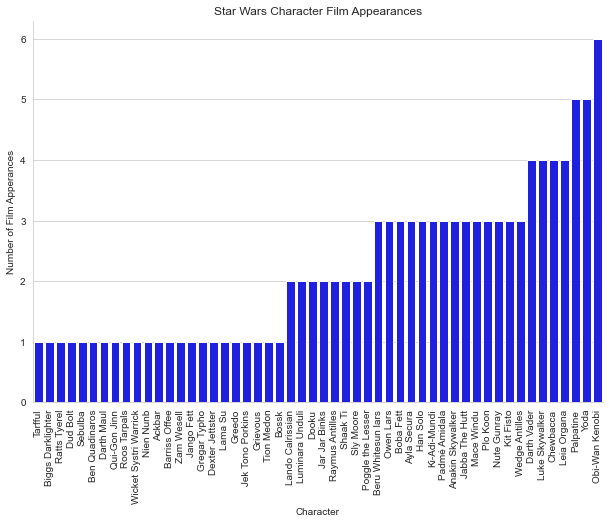

In [90]:
#experiment
#Seaborn Character Masses Plot
sns.catplot(x="Character", y="Number of Film Appearances", kind="bar", data=clean_merged_characters_species_film_df, color="blue", height=6, aspect = 1.5)
plt.xticks(rotation="vertical")
plt.title("Star Wars Character Film Appearances")
plt.ylabel("Number of Film Apperances")
plt.savefig("Figures/Bar_Movies_Per_Character_Count_RK.png")
plt.show()

# PLANETS

In [74]:
#planets
print(json.dumps(planets_response, indent=2, sort_keys=True))

{
  "count": 60,
  "next": "http://swapi.dev/api/planets/?page=2",
  "previous": null,
  "results": [
    {
      "climate": "arid",
      "created": "2014-12-09T13:50:49.641000Z",
      "diameter": "10465",
      "edited": "2014-12-20T20:58:18.411000Z",
      "films": [
        "http://swapi.dev/api/films/1/",
        "http://swapi.dev/api/films/3/",
        "http://swapi.dev/api/films/4/",
        "http://swapi.dev/api/films/5/",
        "http://swapi.dev/api/films/6/"
      ],
      "gravity": "1 standard",
      "name": "Tatooine",
      "orbital_period": "304",
      "population": "200000",
      "residents": [
        "http://swapi.dev/api/people/1/",
        "http://swapi.dev/api/people/2/",
        "http://swapi.dev/api/people/4/",
        "http://swapi.dev/api/people/6/",
        "http://swapi.dev/api/people/7/",
        "http://swapi.dev/api/people/8/",
        "http://swapi.dev/api/people/9/",
        "http://swapi.dev/api/people/11/",
        "http://swapi.dev/api/people/43

In [75]:
#create lists of planets and their attributes
planet_names = []
planet_terrains = []
planet_climates = []
planet_populations = []
planet_diameters = []
planet_films = []
planet_orbitals = []
planet_climates = []

pages = ["1", "2", "3", "4", "5", "6"]
find_planet_url = f"http://swapi.dev/api/planets/?page="

for page_number in pages:
    find_planets_response = requests.get(find_planet_url + page_number).json()
    
#for loop to list names in films
    for planets in find_planets_response["results"]:
        planet_name = planets["name"]
        planet_names.append(planet_name)
        planet_terrain = planets["terrain"]
        planet_terrains.append(planet_terrain)
        planet_climate = planets["climate"]
        planet_climates.append(planet_climate)
        planet_population = planets["population"]
        planet_populations.append(planet_population)
        planet_diameter = planets["diameter"]
        planet_diameters.append(planet_diameter)
        planet_film = planets["films"]
        planet_films.append(planet_film)
        planet_orbital = planets["orbital_period"]
        planet_orbitals.append(planet_orbital)
        planet_climate = planets["climate"]
        planet_climates.append(planet_climate)
        planet_count = len(planet_names)

        print(f'{planet_count} {planet_name} found!')


1 Tatooine found!
2 Alderaan found!
3 Yavin IV found!
4 Hoth found!
5 Dagobah found!
6 Bespin found!
7 Endor found!
8 Naboo found!
9 Coruscant found!
10 Kamino found!
11 Geonosis found!
12 Utapau found!
13 Mustafar found!
14 Kashyyyk found!
15 Polis Massa found!
16 Mygeeto found!
17 Felucia found!
18 Cato Neimoidia found!
19 Saleucami found!
20 Stewjon found!
21 Eriadu found!
22 Corellia found!
23 Rodia found!
24 Nal Hutta found!
25 Dantooine found!
26 Bestine IV found!
27 Ord Mantell found!
28 unknown found!
29 Trandosha found!
30 Socorro found!
31 Mon Cala found!
32 Chandrila found!
33 Sullust found!
34 Toydaria found!
35 Malastare found!
36 Dathomir found!
37 Ryloth found!
38 Aleen Minor found!
39 Vulpter found!
40 Troiken found!
41 Tund found!
42 Haruun Kal found!
43 Cerea found!
44 Glee Anselm found!
45 Iridonia found!
46 Tholoth found!
47 Iktotch found!
48 Quermia found!
49 Dorin found!
50 Champala found!
51 Mirial found!
52 Serenno found!
53 Concord Dawn found!
54 Zolan found!
5

In [76]:
#planets df
planets_df = pd.DataFrame({"Name": planet_names, 
                            "Population": planet_populations,
                            "Diameter": planet_diameters,
                            "Orbital Period": planet_orbitals
                            })
planets_df.to_csv("csv_output/planets_output.csv")
planets_df = pd.read_csv("csv_output/planets_output_formatted.csv")
planets_df.head()

,Unnamed: 0,Name,Population,Diameter,Orbital Period
0,0,Tatooine,200000,10465,304
1,1,Alderaan,2000000000,12500,364
2,2,Yavin IV,1000,10200,4818
3,3,Hoth,unknown,7200,549
4,4,Dagobah,unknown,8900,341


In [77]:
#Need to make and clean a new df for size vs orbital period
cleaning_planets_df = planets_df.drop(planets_df[planets_df['Orbital Period'] == 'unknown'].index)
cleaning_planets_df = cleaning_planets_df.drop(cleaning_planets_df[cleaning_planets_df["Diameter"] == 'unknown'].index)
cleaning_planets_df = cleaning_planets_df.drop(cleaning_planets_df[cleaning_planets_df["Diameter"] == '0'].index)
cleaning_planets_df = cleaning_planets_df.drop(cleaning_planets_df[cleaning_planets_df["Population"] == 'unknown'].index)
cleaning_planets_df

,Unnamed: 0,Name,Population,Diameter,Orbital Period
0,0,Tatooine,200000,10465,304
1,1,Alderaan,2000000000,12500,364
2,2,Yavin IV,1000,10200,4818
5,5,Bespin,6000000,118000,5110
6,6,Endor,30000000,4900,402
7,7,Naboo,4500000000,12120,312
8,8,Coruscant,1000000000000,12240,368
9,9,Kamino,1000000000,19720,463
10,10,Geonosis,100000000000,11370,256
11,11,Utapau,95000000,12900,351


In [78]:
#convert all to numeric
planet_series_population = pd.to_numeric(cleaning_planets_df["Population"])
planet_series_diameter = pd.to_numeric(cleaning_planets_df["Diameter"])
planet_series_orbital = pd.to_numeric(cleaning_planets_df["Orbital Period"])

clean_planets_df = pd.DataFrame({"Name": cleaning_planets_df["Name"],
                                             "Population": planet_series_population,
                                             "Diameter": planet_series_diameter,
                                             "Orbital Period": planet_series_orbital})

clean_planets_df

,Name,Population,Diameter,Orbital Period
0,Tatooine,200000,10465,304
1,Alderaan,2000000000,12500,364
2,Yavin IV,1000,10200,4818
5,Bespin,6000000,118000,5110
6,Endor,30000000,4900,402
7,Naboo,4500000000,12120,312
8,Coruscant,1000000000000,12240,368
9,Kamino,1000000000,19720,463
10,Geonosis,100000000000,11370,256
11,Utapau,95000000,12900,351


# PLOTS PLOTS PLOTS

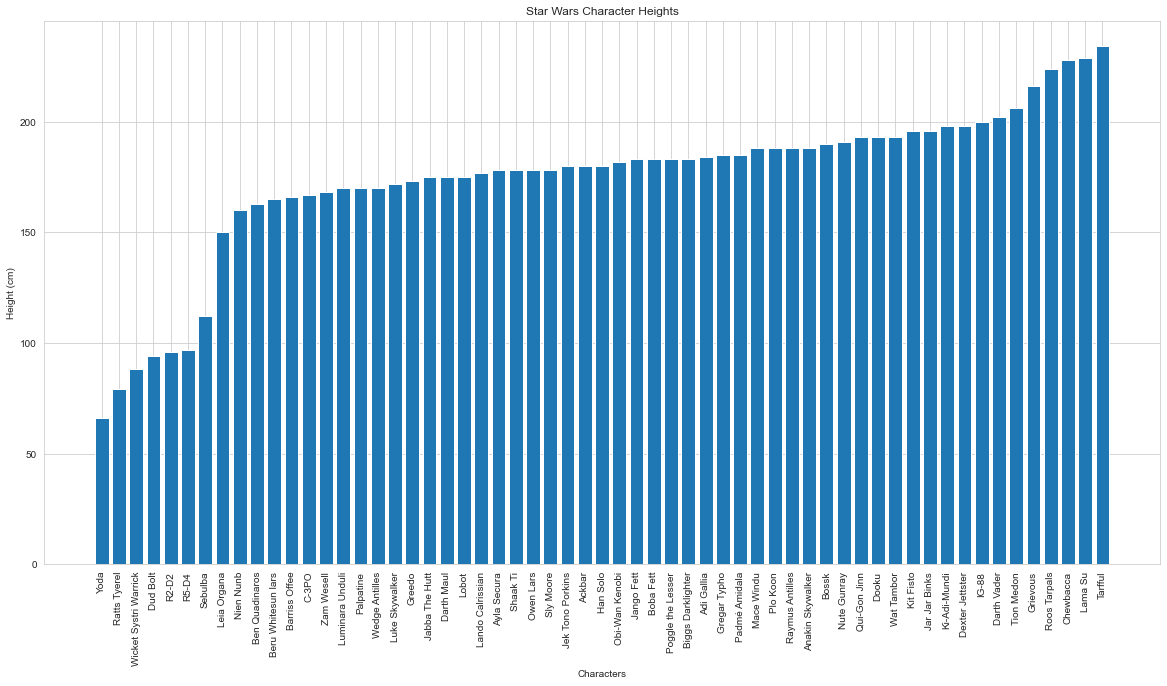

In [79]:
#bar chart for character heights
tick_locations = [value for value in clean_characters_df["Character"]]
labels = clean_characters_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(height_df["Character"], height_df["Height"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Height (cm)")
plt.xlabel("Characters")
plt.title("Star Wars Character Heights")
plt.savefig("Figures/Bar_Character_Height.png")
plt.show()

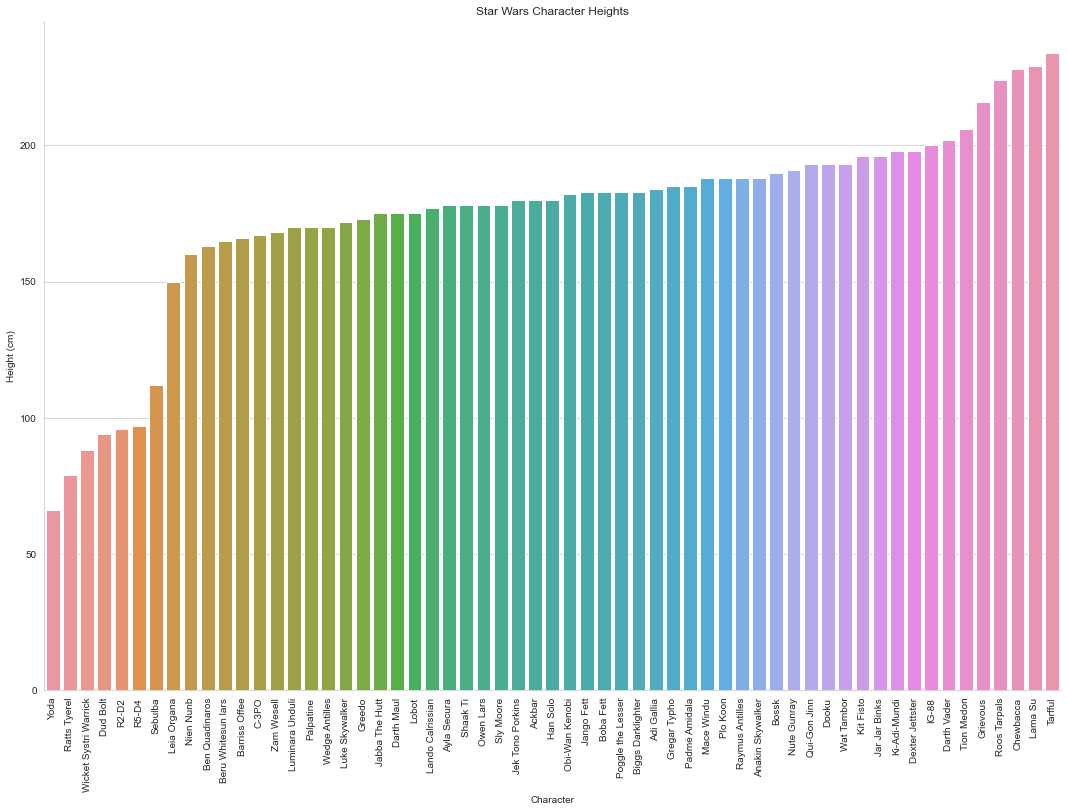

In [80]:
#Seaborn Character Heights Plot
sns.catplot(x="Character", y="Height", kind="bar", data=height_df, height=10, aspect = 1.5,)
plt.xticks(rotation="vertical")
plt.title("Star Wars Character Heights")
plt.ylabel("Height (cm)")
plt.savefig("Figures/Seaborn_Character_Heights.png")

#Statistical Breakdown of Character Heights, Masses, and Film Apperances

In [81]:
clean_characters_df.describe()

,Height,Mass,Number of Film Appearances
count,59.000000,59.000000,59.000000
mean,174.355932,97.311864,2.220339
std,35.536656,169.457163,1.439202
min,66.000000,15.000000,1.000000
25%,170.000000,55.600000,1.000000
50%,180.000000,79.000000,2.000000
75%,192.000000,84.500000,3.000000
max,234.000000,1358.000000,6.000000


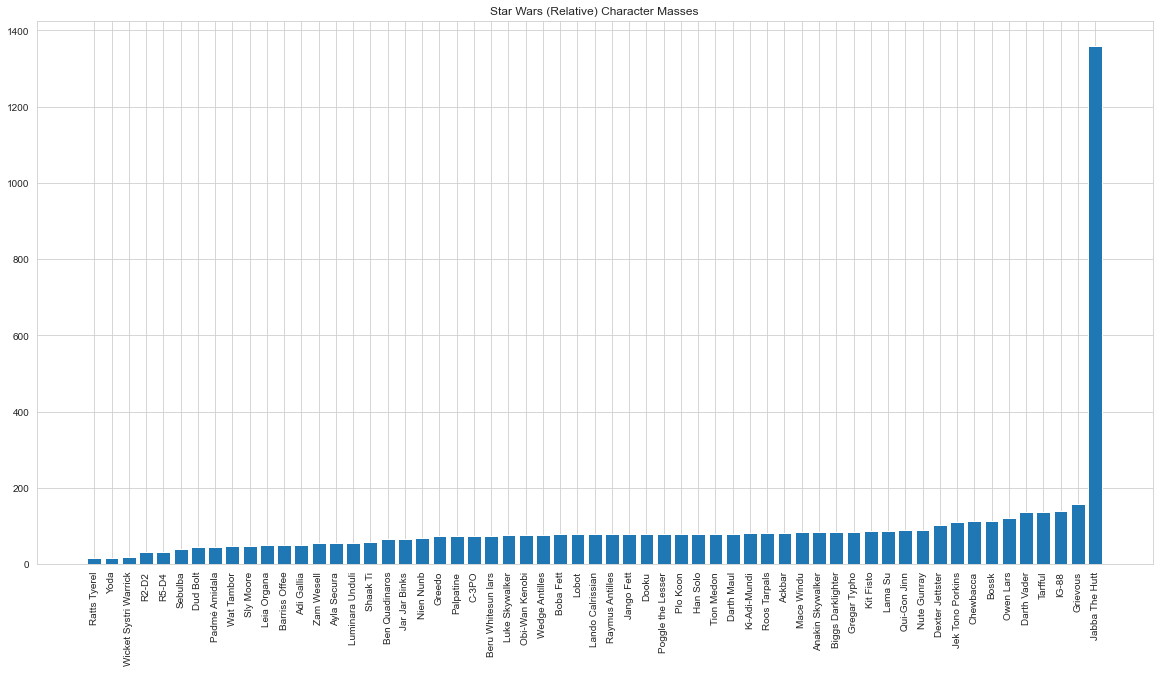

In [82]:
#bar chart for character masses
tick_locations = [value for value in clean_characters_df["Character"]]
labels = clean_characters_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(mass_df["Character"], mass_df["Mass"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars (Relative) Character Masses")
plt.savefig("Figures/Bar_Character_Mass.png")
plt.show()

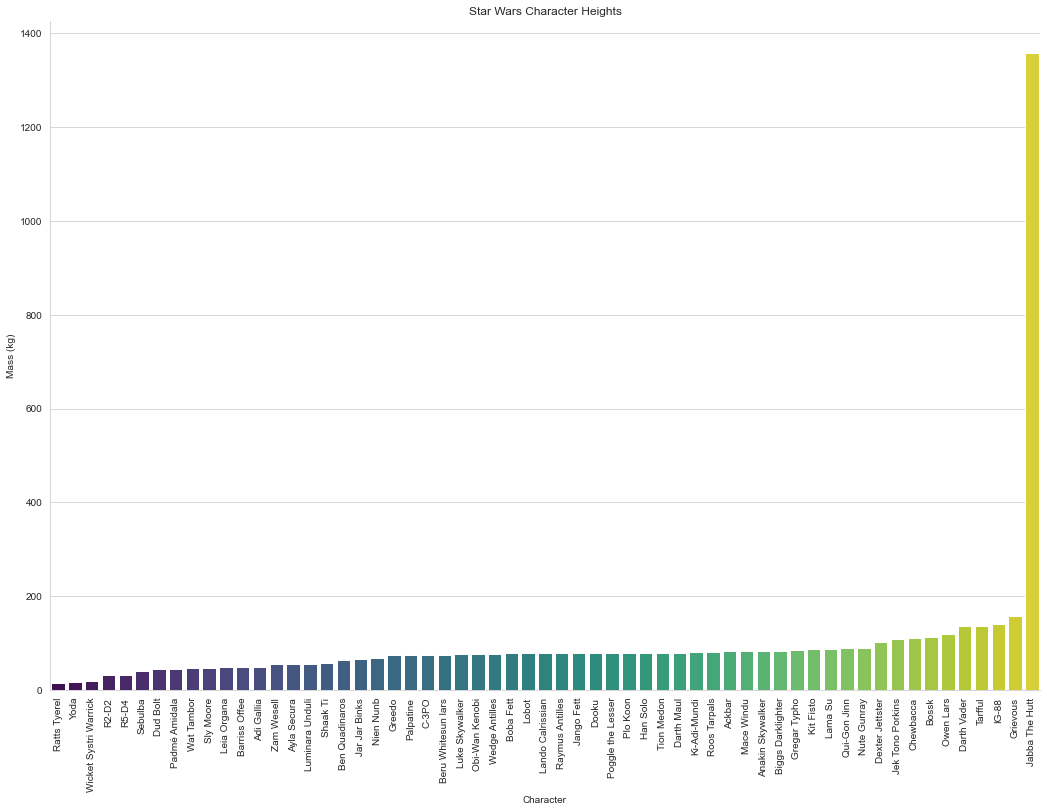

In [83]:
#Seaborn Character Masses Plot
sns.catplot(x="Character", y="Mass", kind="bar", data=mass_df, height=10, aspect = 1.5, palette="viridis")
plt.xticks(rotation="vertical")
plt.title("Star Wars Character Heights")
plt.ylabel("Mass (kg)")
plt.savefig("Figures/Seaborn_Character_Masses.png")

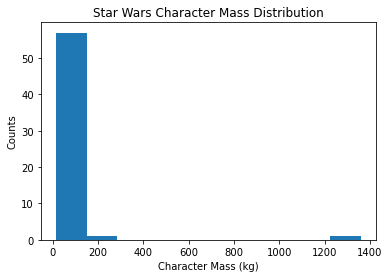

NormaltestResult(statistic=2.980538185898223, pvalue=0.22531201750591007)
------------------------------------------
The sample standard deviation is 168.0
The sample variance using the NumPy module is 28229.0
------------------------------------------
The mean mass of Star Wars characters with Jabba is 97.3
------------------------------------------
Roughly 68% of the data is between -70.7 and 265.3 kgs
Roughly 95% of the data is between -238.7 and 433.3 kgs
Roughly 99.7% of the data is between -406.7 and 601.4 kgs


In [42]:
plt.hist(mass_df["Mass"])
plt.title("Star Wars Character Mass Distribution")
plt.xlabel("Character Mass (kg)")
plt.ylabel("Counts")
plt.savefig("Figures/Hist_Character_Mass.png")
plt.show()
print(sts.normaltest(mass_df["Mass"].sample(50)))
print('------------------------------------------')
#stdev and var using numpy
sd_numpy = np.std(mass_df["Mass"],ddof = 0)
print(f"The sample standard deviation is {round(sd_numpy,1)}")
var_numpy = np.var(mass_df["Mass"],ddof = 0)
print(f"The sample variance using the NumPy module is {round(var_numpy,1)}")
print('------------------------------------------')
# Calculate the 68-95-99.7 rule using the standard deviation
mean_numpy = np.mean(mass_df["Mass"])
print(f"The mean mass of Star Wars characters with Jabba is {round(mean_numpy,1)}")
print('------------------------------------------')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,1)} and {round(mean_numpy+sd_numpy,1)} kgs")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,1)} and {round(mean_numpy+2*sd_numpy,1)} kgs")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,1)} and {round(mean_numpy+3*sd_numpy,1)} kgs")

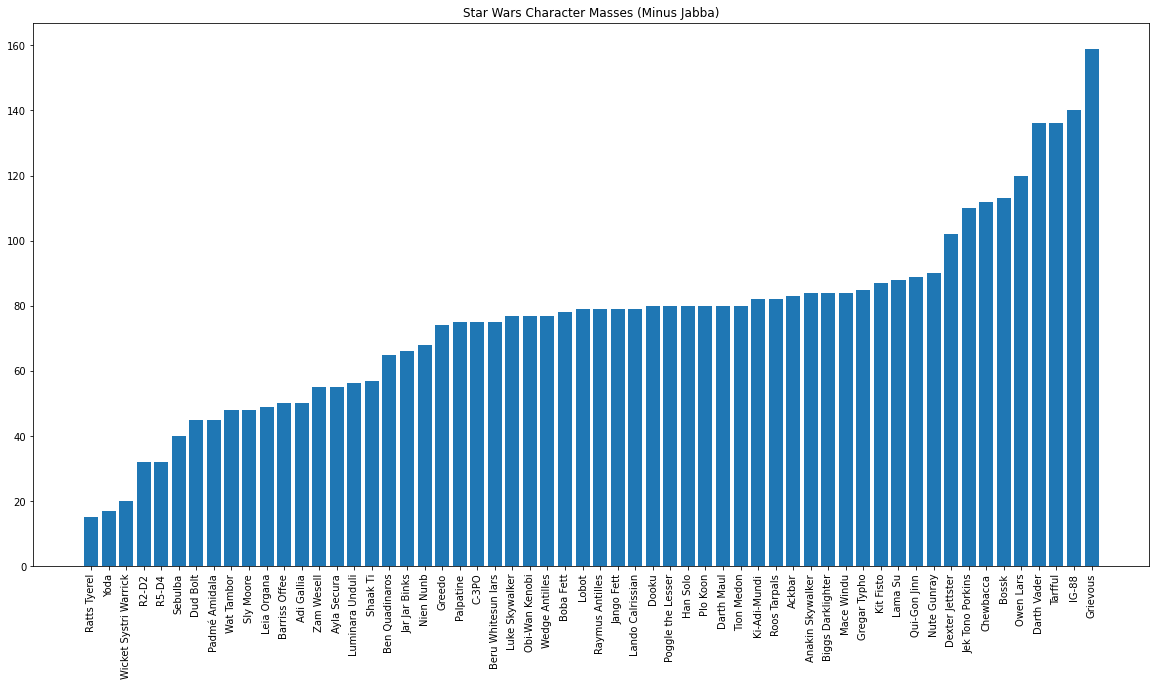

In [43]:
no_jabba_mass_df = clean_characters_df.drop([14])
no_jabba_mass_df = no_jabba_mass_df.sort_values(["Mass"], ascending=True)
no_jabba_mass_df = no_jabba_mass_df.reset_index(drop=True)

tick_locations = [value for value in no_jabba_mass_df["Character"]]
labels = no_jabba_mass_df["Character"]
plt.figure(figsize=(20, 10))
plt.bar(no_jabba_mass_df["Character"], no_jabba_mass_df["Mass"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars Character Masses (Minus Jabba)")
plt.savefig("Figures/Bar_Character_Mass_NoJabba.png")
plt.show()

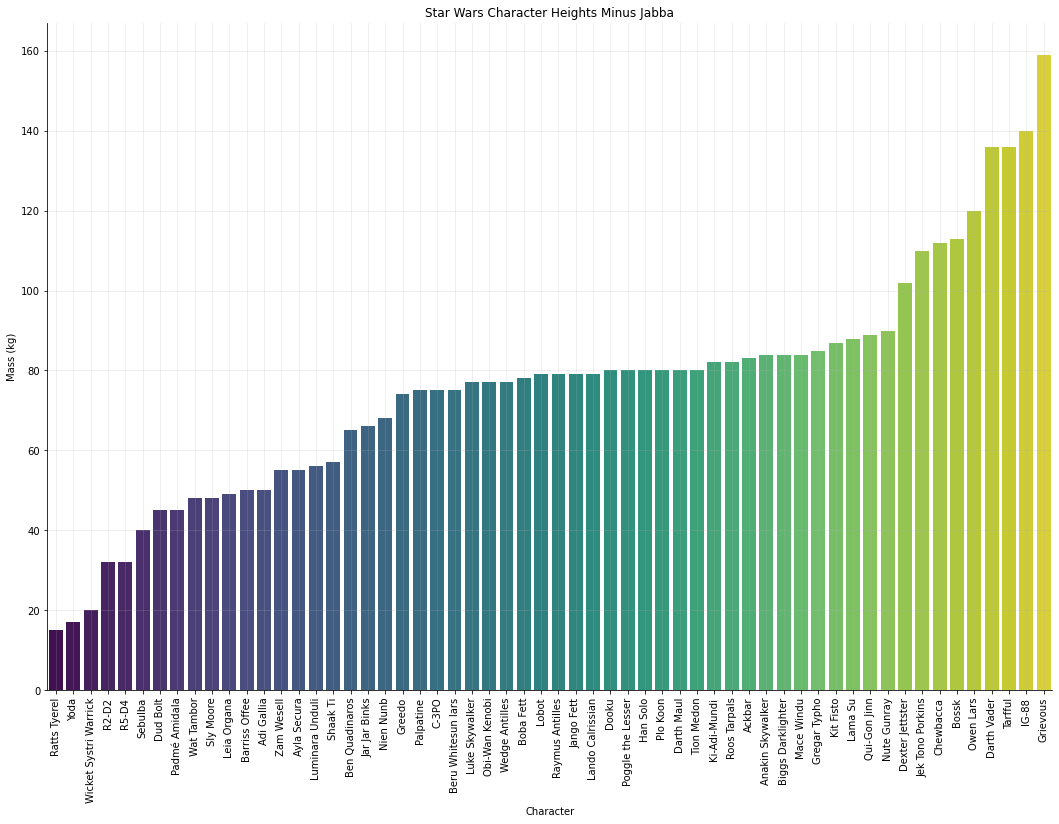

In [44]:

sns.catplot(x="Character", y="Mass", kind="bar", data=no_jabba_mass_df, height=10, aspect = 1.5, palette="viridis")
plt.xticks(rotation="vertical")
plt.grid(alpha=.25)
plt.title("Star Wars Character Heights Minus Jabba")
plt.ylabel("Mass (kg)")
plt.savefig("Figures/Seaborn_Character_Masses_NoJabba.png")

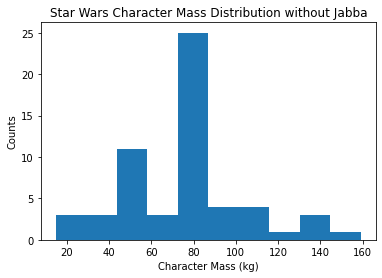

NormaltestResult(statistic=3.354484696813892, pvalue=0.18688863983690654)
------------------------------------------
The sample standard deviation is 29.0
The sample variance using the NumPy module is 841.0
------------------------------------------
The mean mass of Star Wars characters without Jabba is 75.6
------------------------------------------
Roughly 68% of the data is between 46.6 and 104.6 kgs
Roughly 95% of the data is between 17.6 and 133.6 kgs
Roughly 99.7% of the data is between -11.4 and 162.6 kgs


In [45]:
plt.hist(no_jabba_mass_df["Mass"])
plt.title("Star Wars Character Mass Distribution without Jabba")
plt.xlabel("Character Mass (kg)")
plt.ylabel("Counts")
plt.savefig("Figures/Hist_Character_Mass_NoJabba.png")
plt.show()
print(sts.normaltest(no_jabba_mass_df["Mass"].sample(50)))
print('------------------------------------------')
#stdev and var using numpy
sd_numpy = np.std(no_jabba_mass_df["Mass"],ddof = 0)
print(f"The sample standard deviation is {round(sd_numpy,1)}")
var_numpy = np.var(no_jabba_mass_df["Mass"],ddof = 0)
print(f"The sample variance using the NumPy module is {round(var_numpy,1)}")
print('------------------------------------------')
# Calculate the 68-95-99.7 rule using the standard deviation
mean_numpy = np.mean(no_jabba_mass_df["Mass"])
print(f"The mean mass of Star Wars characters without Jabba is {round(mean_numpy,1)}")
print('------------------------------------------')
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,1)} and {round(mean_numpy+sd_numpy,1)} kgs")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,1)} and {round(mean_numpy+2*sd_numpy,1)} kgs")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,1)} and {round(mean_numpy+3*sd_numpy,1)} kgs")

In [46]:
print(f'Statistical Analysis of Mass with Jabba:')
print(mass_df["Mass"].describe())
print(f'Statistical Analysis of Mass without Jabba:')
print(no_jabba_mass_df["Mass"].describe())


Statistical Analysis of Mass with Jabba:
count      59.000000
mean       97.311864
std       169.457163
min        15.000000
25%        55.600000
50%        79.000000
75%        84.500000
max      1358.000000
Name: Mass, dtype: float64
Statistical Analysis of Mass without Jabba:
count     58.000000
mean      75.575862
std       29.252514
min       15.000000
25%       55.300000
50%       79.000000
75%       84.000000
max      159.000000
Name: Mass, dtype: float64


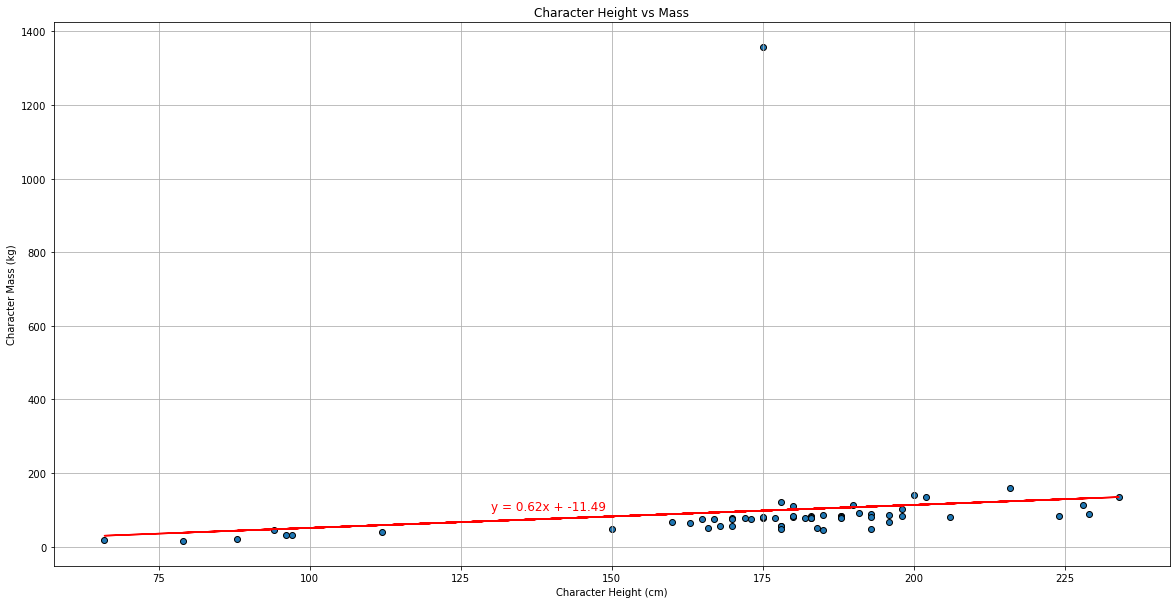

The r-squared is: 0.017124071816855775


In [47]:
#scatter plot height vs mass, Need regression
x_values = clean_characters_df["Height"]
y_values = clean_characters_df["Mass"].astype(float)
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values, edgecolors="black")
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(130,100),fontsize=12,color="red")
#aesthetics
plt.grid()
plt.title("Character Height vs Mass")
plt.xlabel("Character Height (cm)")
plt.ylabel("Character Mass (kg)")
plt.savefig("Figures/Scatter_Character_HeightVsMass.png")
plt.show()
print(f"The r-squared is: {r_squared}")

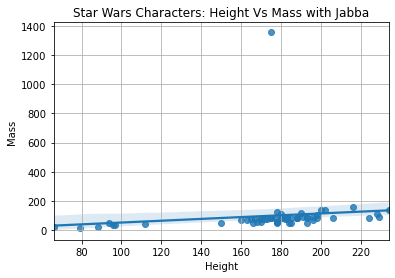

In [48]:
sns.regplot(x="Height", y="Mass", data=clean_characters_df);
plt.title("Star Wars Characters: Height Vs Mass with Jabba")
plt.grid()

plt.savefig("Figures/Seaborn_LINE_Character_HeightsVsMass_RK.png")
plt.show()

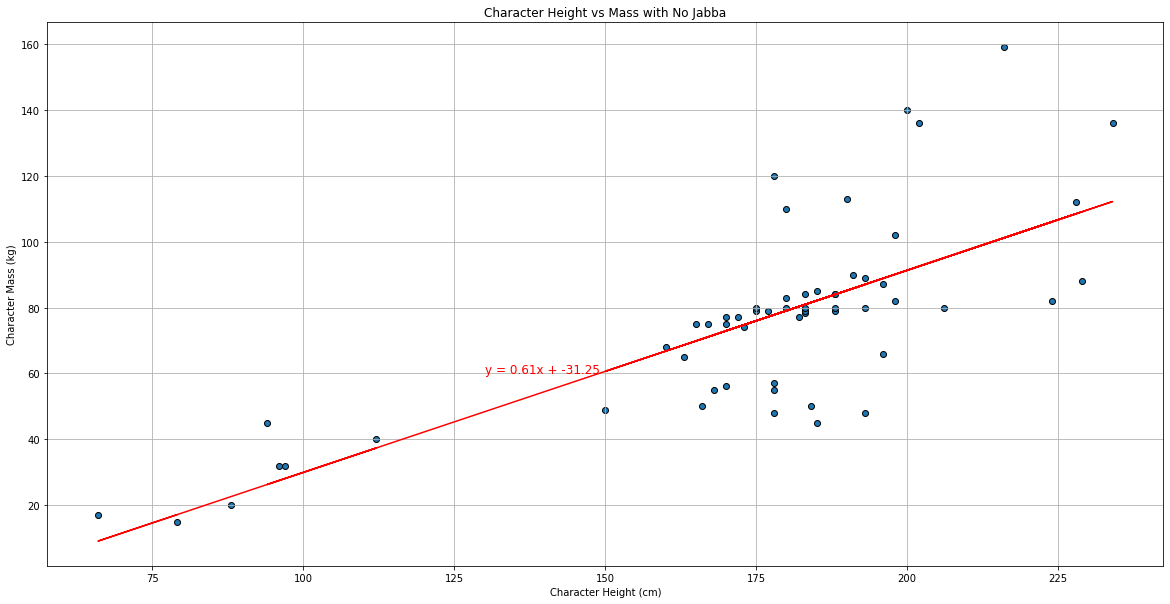

The r-squared is: 0.5637880133716309


In [49]:
#scatter plot height vs mass, Need regression
x_values = no_jabba_mass_df["Height"]
y_values = no_jabba_mass_df["Mass"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values, edgecolors="black")
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(130,60),fontsize=12,color="red")
#aesthetics
plt.grid()
plt.title("Character Height vs Mass with No Jabba")
plt.xlabel("Character Height (cm)")
plt.ylabel("Character Mass (kg)")
plt.savefig("Figures/Scatter_Character_HeightVsMass_NoJabba.png")
plt.show()
print(f"The r-squared is: {r_squared}")

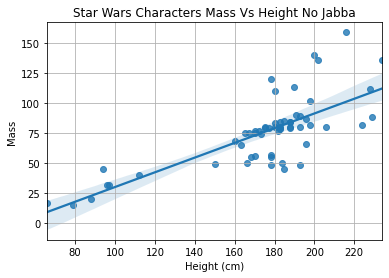

In [50]:
sns.regplot(x="Height", y="Mass", data=no_jabba_mass_df);
plt.title("Star Wars Characters Mass Vs Height No Jabba")
plt.xlabel("Height (cm)")
plt.grid()
plt.savefig("Figures/Seaborn_LINE_Character_Masses_NoJabba_RK.png")
plt.show()

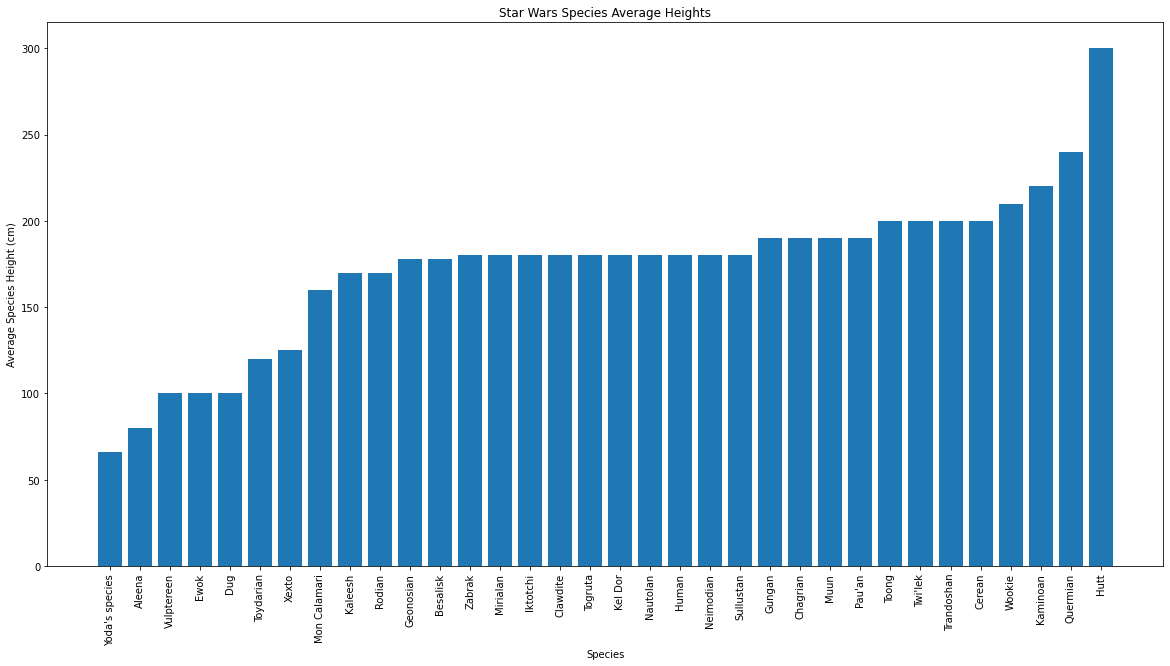

In [51]:
#SPECIES Average Height Bar Plot
tick_locations = [value for value in clean_species_df["Species"]]
labels = clean_species_df["Species"]
plt.figure(figsize=(20, 10))
plt.bar(clean_species_df["Species"], clean_species_df["Average Height"].astype(float))
plt.xticks(tick_locations, labels, rotation="vertical")
plt.title("Star Wars Species Average Heights")
plt.xlabel("Species")
plt.ylabel("Average Species Height (cm)")
plt.savefig("Figures/Bar_Species_AvgHeights.png")
plt.show()

# experiment

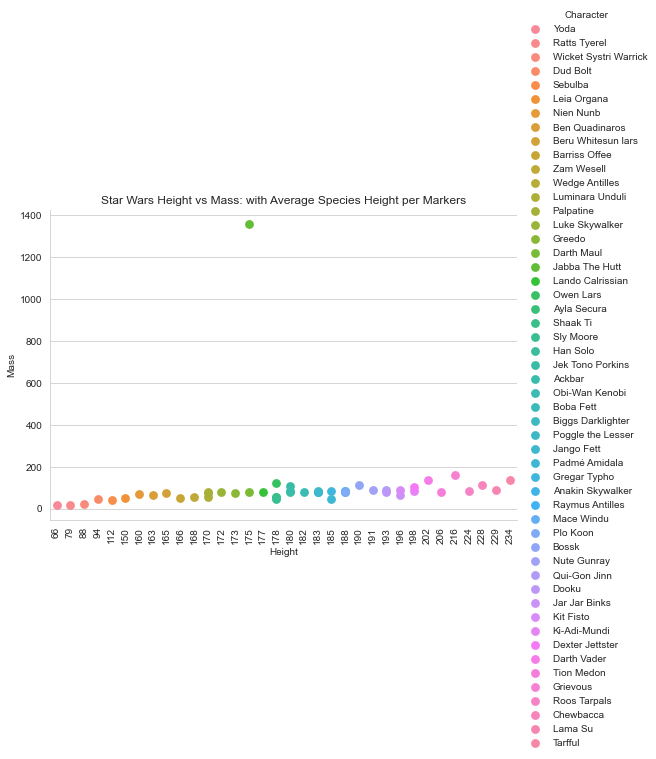

In [52]:

sns.set_style("whitegrid")
#tick_locations = [value for value in clean_merged_characters_species_df["Character"]]
sns.catplot(x="Height", y="Mass", hue="Character", kind="point", data=clean_merged_characters_species_df, height = 5, aspect = 1.5)
plt.xticks(rotation="vertical")
plt.title("Star Wars Height vs Mass: with Average Species Height per Markers")
plt.savefig("Figures/Seaborn_Height_Mass_AverageAll_RK.png")
plt.show()

In [53]:
#make new DF without Jabba
no_jabba_merge_df = clean_merged_characters_species_df.drop([17])
no_jabba_merge_df = no_jabba_merge_df.reset_index(drop=True)
no_jabba_merge_df.head(18)

,Character,Height,Mass,Species,Average Species Height,First Film,Last Film,Number of Film Appearances
0,Yoda,66,17.0,Yoda's species,66,http://swapi.dev/api/films/2/,http://swapi.dev/api/films/6/,5
1,Ratts Tyerel,79,15.0,Aleena,80,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
2,Wicket Systri Warrick,88,20.0,Ewok,100,http://swapi.dev/api/films/3/,http://swapi.dev/api/films/3/,1
3,Dud Bolt,94,45.0,Vulptereen,100,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
4,Sebulba,112,40.0,Dug,100,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
5,Leia Organa,150,49.0,Human,180,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,4
6,Nien Nunb,160,68.0,Sullustan,180,http://swapi.dev/api/films/3/,http://swapi.dev/api/films/3/,1
7,Ben Quadinaros,163,65.0,Toong,200,http://swapi.dev/api/films/4/,http://swapi.dev/api/films/4/,1
8,Beru Whitesun lars,165,75.0,Human,180,http://swapi.dev/api/films/1/,http://swapi.dev/api/films/6/,3
9,Barriss Offee,166,50.0,Mirialan,180,http://swapi.dev/api/films/5/,http://swapi.dev/api/films/5/,1


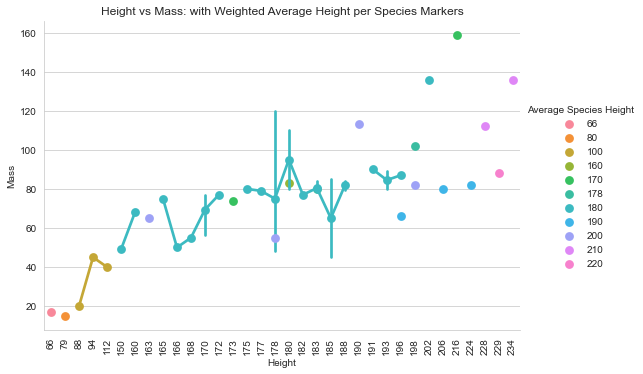

In [54]:
#new plot without jabba
sns.set_style("whitegrid")

sns.catplot(x="Height", y="Mass", hue="Average Species Height", kind="point", data=no_jabba_merge_df, height = 5, aspect = 1.5)

plt.title("Height vs Mass: with Weighted Average Height per Species Markers")
plt.xticks(rotation="vertical")
plt.savefig("Figures/Seaborn_Scatter_Height_Mass_With_Jabba_RK.png")
plt.show()

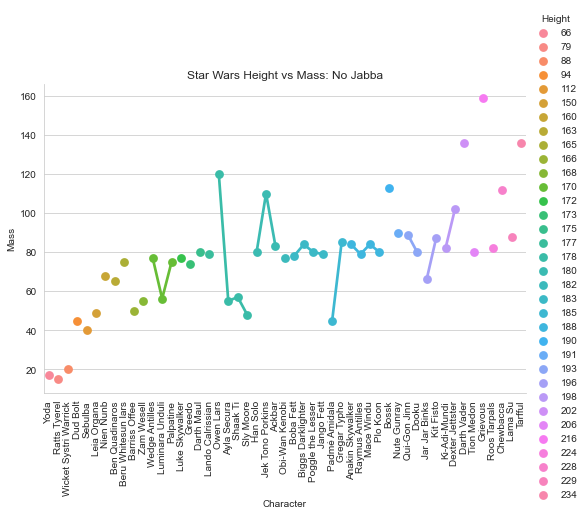

In [55]:
#experiment with
sns.set_style("whitegrid")
#tick_locations = [value for value in clean_merged_characters_species_df["Character"]]
sns.catplot(x="Character", y="Mass", hue="Height", kind="point", data=no_jabba_merge_df, height = 5, aspect = 1.5)
plt.xticks(rotation="vertical")
plt.title("Star Wars Height vs Mass: No Jabba")
plt.savefig("Figures/Seaborn_Scatter_Height_Mass_NoJabba_RK.png")
plt.show()

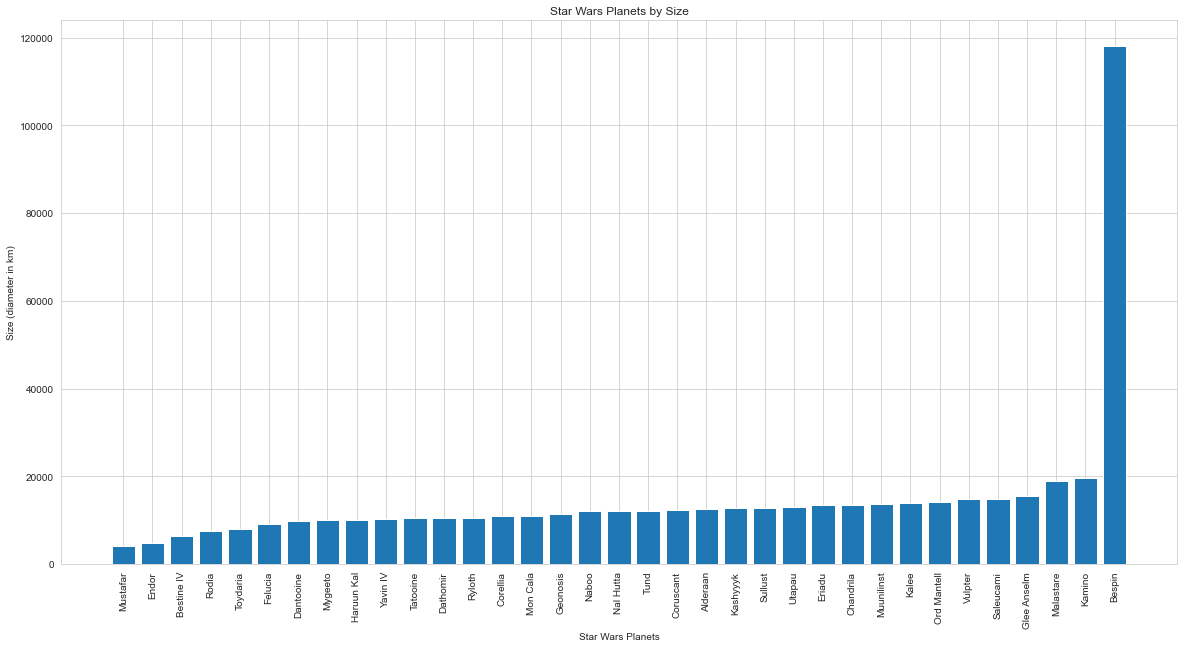

In [56]:
#create chart-specific df with sorted values for planet diameter
clean_planets_diameter_df = clean_planets_df.sort_values(["Diameter"], ascending=True)
#bar chart planet size by diameter
x_axis = clean_planets_diameter_df["Name"]
y_axis = clean_planets_diameter_df["Diameter"]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20, 10))
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.title("Star Wars Planets by Size")
plt.xlabel("Star Wars Planets")
plt.ylabel("Size (diameter in km)")
plt.savefig("Figures/Bar_Planet_Size.png")
plt.show()

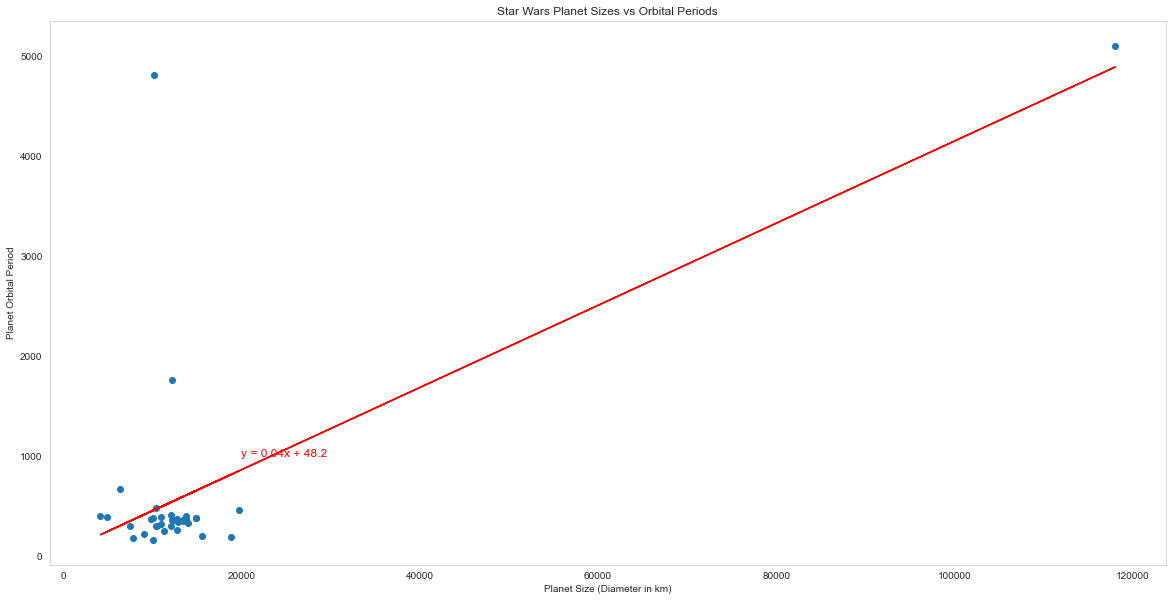

In [57]:
#scatter plot PLANET SIZE vs ORBITAL PERIOD.  Need regression
x_values = clean_planets_df["Diameter"]
y_values = clean_planets_df["Orbital Period"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000,1000),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Sizes vs Orbital Periods")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Orbital Period")
plt.grid()
plt.savefig("Figures/Scatter_Planet_SizeVsOrbital.png")
plt.show()

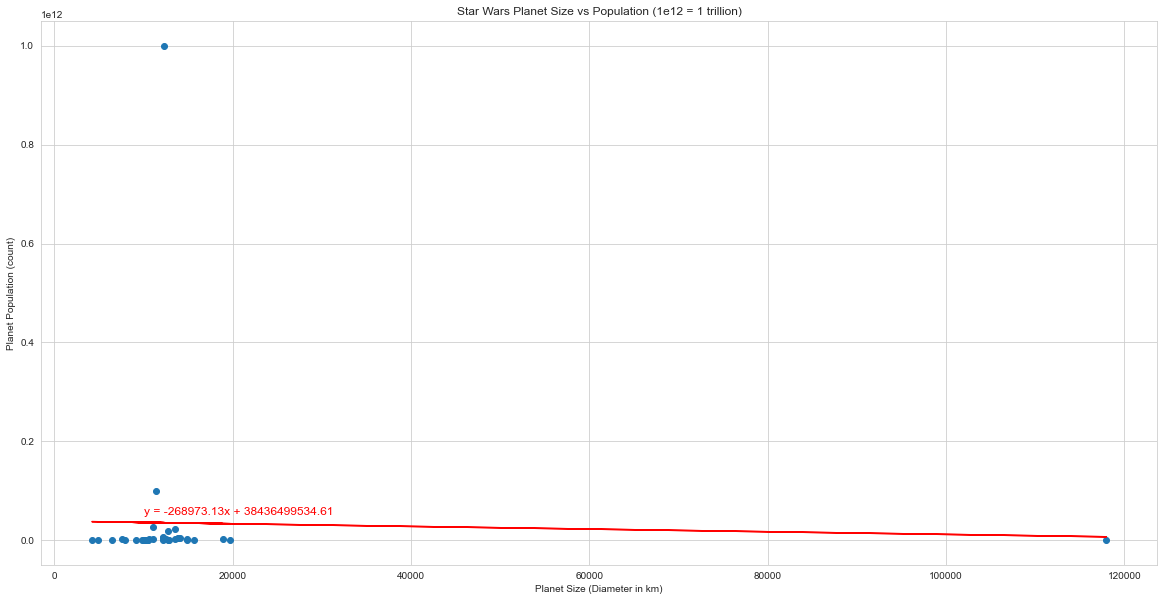

In [58]:
clean_population_df = clean_planets_df.sort_values(["Population"], ascending=False)
clean_population_df = clean_population_df.reset_index(drop=True)
#scatter plot planet size vs population. Need regression

x_values = clean_population_df["Diameter"]
y_values = clean_population_df["Population"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,.05e12),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Size vs Population (1e12 = 1 trillion)")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Population (count)")
plt.savefig("Figures/Scatter_Planet_SizevsPopulation.png")
plt.show()

Text(0.5, 1.0, 'Star Wars Planet Size vs Population (1e12 = 1 trillion)')

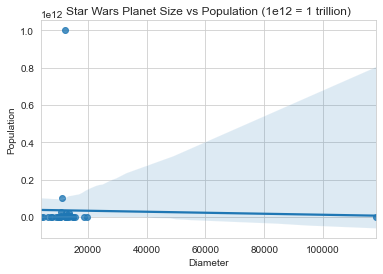

In [59]:
sns.regplot(x="Diameter", y="Population", data=clean_population_df);
plt.title("Star Wars Planet Size vs Population (1e12 = 1 trillion)")

NormaltestResult(statistic=81.28380919826965, pvalue=2.235862533749849e-18)
The population standard deviation is 166485582263.77155
The population variance is 2.771744910170704e+22


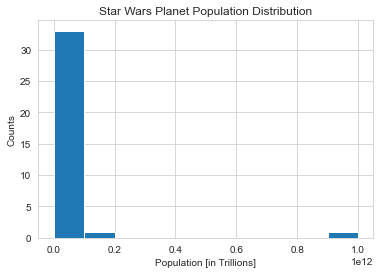

In [60]:
#statistics for Planet Population Distribution
plt.hist(clean_population_df["Population"])
plt.title("Star Wars Planet Population Distribution")
plt.xlabel("Population [in Trillions]")
plt.ylabel("Counts")
print(sts.normaltest(clean_planets_df["Population"].sample(35)))
sd_numpy = np.std(clean_planets_df["Population"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")
var_numpy = np.var(clean_planets_df["Population"],ddof = 0)
print(f"The population variance is {var_numpy}")
plt.savefig("Figures/Hist_Planet_Population.png")
plt.show()

In [61]:
#drop coruscant as an outlier (1 trillion people)
no_coruscant_planets_df = clean_population_df.drop([0])
no_coruscant_planets_df.head()

,Name,Population,Diameter,Orbital Period
1,Geonosis,100000000000,11370,256
2,Mon Cala,27000000000,11030,398
3,Eriadu,22000000000,13490,360
4,Sullust,18500000000,12780,263
5,Nal Hutta,7000000000,12150,413


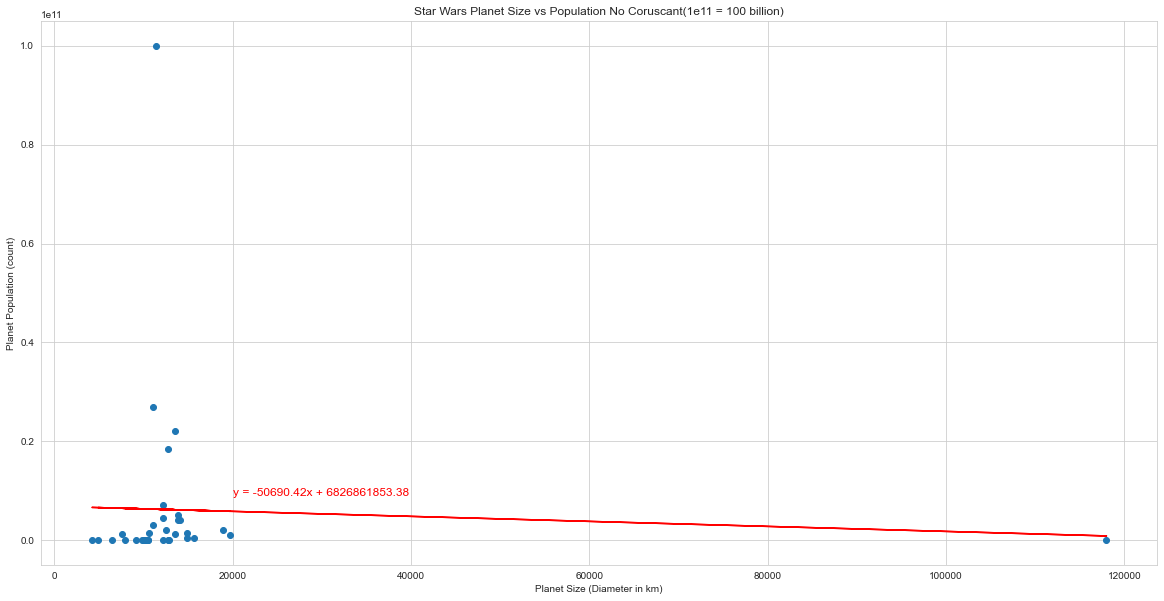

The r-squared is: 0.0027865844847489766


In [62]:
#scatter for no coruscant planets
x_values = no_coruscant_planets_df["Diameter"]
y_values = no_coruscant_planets_df["Population"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000,.09e11),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Size vs Population No Coruscant(1e11 = 100 billion)")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Population (count)")
plt.savefig("Figures/Scatter_Planet_SizevsPopulation.png")
plt.show()
print(f"The r-squared is: {r_squared}")

Text(0.5, 1.0, 'Star Wars Planet Size vs Population No Coruscant (1e11 = 100 billion)')

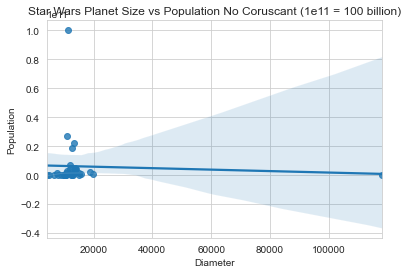

In [63]:
sns.regplot(x="Diameter", y="Population", data=no_coruscant_planets_df);
plt.title("Star Wars Planet Size vs Population No Coruscant (1e11 = 100 billion)")

NormaltestResult(statistic=81.28380919826961, pvalue=2.2358625337498977e-18)
The population standard deviation is 166485582263.77155
The population variance is 2.771744910170704e+22


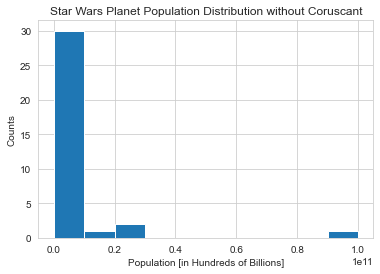

In [64]:
#statistics for Planet Population Distribution
plt.hist(no_coruscant_planets_df["Population"])
plt.title("Star Wars Planet Population Distribution without Coruscant")
plt.xlabel("Population [in Hundreds of Billions]")
plt.ylabel("Counts")
print(sts.normaltest(clean_planets_df["Population"].sample(35)))
sd_numpy = np.std(clean_planets_df["Population"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")
var_numpy = np.var(clean_planets_df["Population"],ddof = 0)
print(f"The population variance is {var_numpy}")
plt.savefig("Figures/Hist_Planet_Population_no_Coruscant.png")
plt.show()


In [65]:
#remove geonosis (100 billion people)
no_geonosis_coruscant_planets_df = no_coruscant_planets_df.drop([1])
no_geonosis_coruscant_planets_df = no_geonosis_coruscant_planets_df.reset_index(drop=True)
no_geonosis_coruscant_planets_df

,Name,Population,Diameter,Orbital Period
0,Mon Cala,27000000000,11030,398
1,Eriadu,22000000000,13490,360
2,Sullust,18500000000,12780,263
3,Nal Hutta,7000000000,12150,413
4,Muunilinst,5000000000,13800,412
5,Naboo,4500000000,12120,312
6,Kalee,4000000000,13850,378
7,Ord Mantell,4000000000,14050,334
8,Corellia,3000000000,11000,329
9,Malastare,2000000000,18880,201


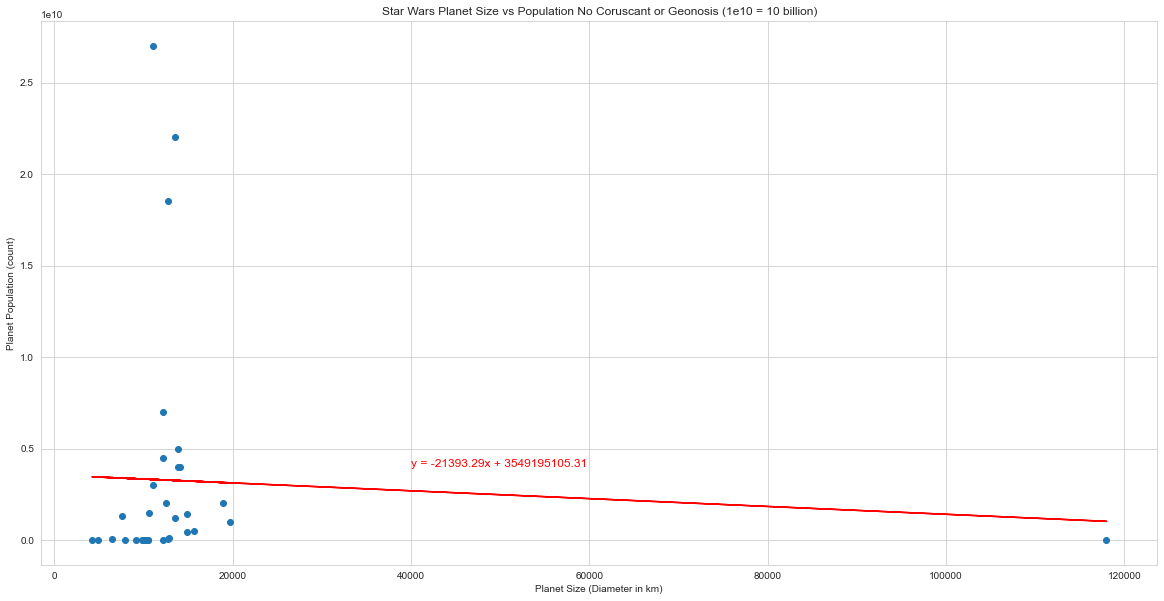

The r-squared is: 0.003802132653873907


In [66]:
#scatter for no coruscant planets
x_values = no_geonosis_coruscant_planets_df["Diameter"]
y_values = no_geonosis_coruscant_planets_df["Population"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000,.4e10),fontsize=12,color="red")
#aesthetics
plt.title("Star Wars Planet Size vs Population No Coruscant or Geonosis (1e10 = 10 billion)")
plt.xlabel("Planet Size (Diameter in km)")
plt.ylabel("Planet Population (count)")
plt.savefig("Figures/Scatter_Planet_SizevsPopulation_no_CoruscantGeonosis.png")
plt.show()
print(f"The r-squared is: {r_squared}")

Text(0.5, 1.0, 'Star Wars Planet Size vs Population No Coruscant or Geonosis (1e10 = 10 billion)')

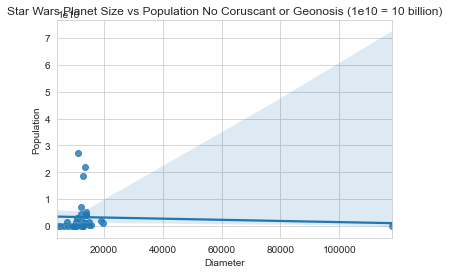

In [67]:
sns.regplot(x="Diameter", y="Population", data=no_geonosis_coruscant_planets_df);
plt.title("Star Wars Planet Size vs Population No Coruscant or Geonosis (1e10 = 10 billion)")

NormaltestResult(statistic=81.28380919826964, pvalue=2.2358625337498654e-18)
The population standard deviation is 166485582263.77155
The population variance is 2.771744910170704e+22


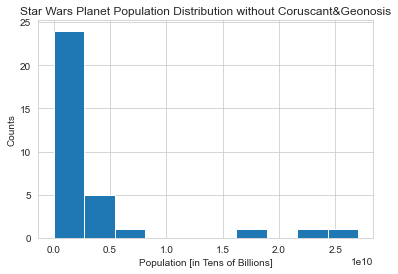

In [68]:
#statistics for Planet Population Distribution
plt.hist(no_geonosis_coruscant_planets_df["Population"])
plt.title("Star Wars Planet Population Distribution without Coruscant&Geonosis")
plt.xlabel("Population [in Tens of Billions]")
plt.ylabel("Counts")
print(sts.normaltest(clean_planets_df["Population"].sample(35)))
sd_numpy = np.std(clean_planets_df["Population"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")
var_numpy = np.var(clean_planets_df["Population"],ddof = 0)
print(f"The population variance is {var_numpy}")
plt.savefig("Figures/Hist_Planet_Population_no_CoruscantGeonosis.png")
plt.show()